In [5]:
from typing import Tuple
import matplotlib.pyplot as plt
import pandas as pd
from scipy.sparse import load_npz
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
def load_data(target_name: str) -> Tuple:
    X = load_npz(f'data/{target_name}.feature.txt.npz')
    df = pd.read_csv(f'data/{target_name}.txt', sep='\t')
    y = df.category
    return X, y

In [4]:
X_train, y_train = load_data('train')
X_valid, y_valid = load_data('valid')
X_test, y_test = load_data('test')

In [9]:
C_params = [0.2, 0.4, 0.6, 0.8, 1.0]
train_scores = []
valid_scores = []
test_scores = []
for C_param in C_params:
    model = LogisticRegression(C=C_param)
    model.fit(X_train, y_train)

    train_score = accuracy_score(model.predict(X_train), y_train)
    valid_score = accuracy_score(model.predict(X_valid), y_valid)
    test_score = accuracy_score(model.predict(X_test), y_test)
    
    train_scores.append(train_score)
    valid_scores.append(valid_score)
    test_scores.append(test_score)

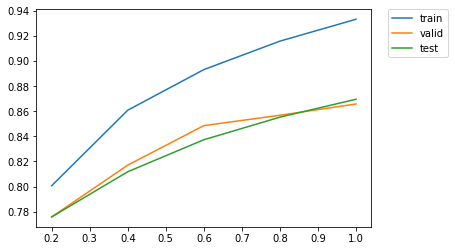

In [17]:
plt.plot(C_params, train_scores, label='train')
plt.plot(C_params, valid_scores, label='valid')
plt.plot(C_params, test_scores, label='test')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.show()